In [167]:
import nltk
import pandas as pd
from nltk import FreqDist
from nltk.collocations import *
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from matplotlib.colors import LinearSegmentedColormap


In [61]:
df = pd.read_csv('filtered_data.csv', sep='|')

In [62]:
df

,Unnamed: 0,category,headline,authors,link,short_description,date,Text,Section,Cleaned Text,Word Tokens,Filtered Tokens
0,0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,CRIME,there be 2 mass shootings in texas last week b...,"['there', 'be', '2', 'mass', 'shootings', 'in'...","['mass', 'shootings', 'texas', 'last', 'week',..."
1,1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT,will smith joins diplo and nicky jam for the 2...,"['will', 'smith', 'joins', 'diplo', 'and', 'ni...","['smith', 'joins', 'diplo', 'nicky', 'jam', 'w..."
2,2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,Hugh Grant Marries For The First Time At Age 5...,ENTERTAINMENT,hugh grant marrie for the first time at age 57...,"['hugh', 'grant', 'marrie', 'for', 'the', 'fir...","['hugh', 'grant', 'marrie', 'first', 'time', '..."
3,3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT,jim carrey blasts castrato adam schiff and dem...,"['jim', 'carrey', 'blasts', 'castrato', 'adam'...","['jim', 'carrey', 'blasts', 'castrato', 'adam'..."
4,4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT,julianna margulies use donald trump poop bag t...,"['julianna', 'margulies', 'use', 'donald', 'tr...","['julianna', 'margulies', 'use', 'donald', 'tr..."
...,...,...,...,...,...,...,...,...,...,...,...,...
200848,200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,SCIENCE & TECHNOLOGY,rim ceo thorsten hein significant plan for bla...,"['rim', 'ceo', 'thorsten', 'hein', 'significan...","['rim', 'ceo', 'thorsten', 'hein', 'significan..."
200849,200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,NaN,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,maria sharapova stun by victoria azarenka in a...,"['maria', 'sharapova', 'stun', 'by', 'victoria...","['maria', 'sharapova', 'stun', 'victoria', 'az..."
200850,200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",NaN,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,giant over patriots jet over colt among most...,"['giant', 'over', 'patriots', 'jet', 'over', '...","['giant', 'patriots', 'jet', 'colt', 'among', ..."
200851,200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,NaN,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,aldon smith arrested 49er linebacker bust for ...,"['aldon', 'smith', 'arrested', '49er', 'lineba...","['aldon', 'smith', 'arrested', '49er', 'lineba..."


In [63]:
stopwords = nltk.corpus.stopwords.words('english')

In [64]:
def get_tokens(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [65]:
def get_filtered_tokens(tokens):
    tokens_filtered = [t for t in tokens if t not in stopwords and t.isdigit() == False]
    return tokens_filtered
    

In [73]:
df['Word Tokens'] = df['Cleaned Text'].apply(get_tokens)

In [71]:
df['Filtered Tokens'] = df['Word Tokens'].apply(get_filtered_tokens)

In [74]:
all_words = []

def all_words_tokens(words):
    for w in list(words):
        all_words.append(w)
        
for i in range(len(df)):
    all_words_tokens(df['Word Tokens'][i])

In [118]:
filtered_words = []

def all_filtered_tokens(words):
    for w in list(words):
        filtered_words.append(w)
        
for i in range(len(df)):
    all_filtered_tokens(df['Filtered Tokens'][i])

In [168]:
colors = ["#81b29a", "#3d405b", "#e07a5f"]
cmap = LinearSegmentedColormap.from_list("colors", colors)

## Unigrams

In [152]:
freq_dist_fw = FreqDist(filtered_words)

In [153]:
freq_dist_fw

FreqDist({'nt': 27490, 'say': 19424, 'new': 18831, 'make': 17801, 'one': 16398, 'get': 16092, 'trump': 13750, 'day': 13272, 'time': 12851, 'year': 12436, ...})

In [154]:
fw_items = freq_dist_fw.most_common(50)

In [159]:
top50_words = [w for (w, c) in fw_items]

In [160]:
top50WCorpus = " ".join(t for t in top50_words)

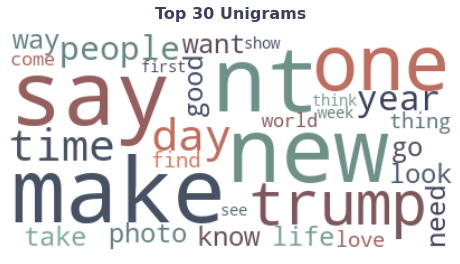

In [188]:
maxWords = 30
wordCloud = WordCloud(max_font_size=80, background_color="white", colormap=cmap, max_words=maxWords)
wordCloud.generate(top50WCorpus)
plt.figure(figsize=(8,6))
plt.title('Top 30 Unigrams', fontsize=16, fontweight="bold", pad=15, color="#3D405B")
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Bigrams

In [77]:
bigrams = list(nltk.bigrams(all_words))
bigrams

[('there', 'be'),
 ('be', '2'),
 ('2', 'mass'),
 ('mass', 'shootings'),
 ('shootings', 'in'),
 ('in', 'texas'),
 ('texas', 'last'),
 ('last', 'week'),
 ('week', 'but'),
 ('but', 'only'),
 ('only', '1'),
 ('1', 'on'),
 ('on', 'tv'),
 ('tv', 'she'),
 ('she', 'leave'),
 ('leave', 'her'),
 ('her', 'husband'),
 ('husband', 'he'),
 ('he', 'kill'),
 ('kill', 'their'),
 ('their', 'child'),
 ('child', 'just'),
 ('just', 'another'),
 ('another', 'day'),
 ('day', 'in'),
 ('in', 'america'),
 ('america', 'will'),
 ('will', 'smith'),
 ('smith', 'joins'),
 ('joins', 'diplo'),
 ('diplo', 'and'),
 ('and', 'nicky'),
 ('nicky', 'jam'),
 ('jam', 'for'),
 ('for', 'the'),
 ('the', '2018'),
 ('2018', 'world'),
 ('world', 'cups'),
 ('cups', 'official'),
 ('official', 'song'),
 ('song', 'of'),
 ('of', 'course'),
 ('course', 'it'),
 ('it', 'have'),
 ('have', 'a'),
 ('a', 'song'),
 ('song', 'hugh'),
 ('hugh', 'grant'),
 ('grant', 'marrie'),
 ('marrie', 'for'),
 ('for', 'the'),
 ('the', 'first'),
 ('first', 'time

In [119]:
bigrams_fw = list(nltk.bigrams(filtered_words))
bigrams_fw

[('mass', 'shootings'),
 ('shootings', 'texas'),
 ('texas', 'last'),
 ('last', 'week'),
 ('week', 'tv'),
 ('tv', 'leave'),
 ('leave', 'husband'),
 ('husband', 'kill'),
 ('kill', 'child'),
 ('child', 'another'),
 ('another', 'day'),
 ('day', 'america'),
 ('america', 'smith'),
 ('smith', 'joins'),
 ('joins', 'diplo'),
 ('diplo', 'nicky'),
 ('nicky', 'jam'),
 ('jam', 'world'),
 ('world', 'cups'),
 ('cups', 'official'),
 ('official', 'song'),
 ('song', 'course'),
 ('course', 'song'),
 ('song', 'hugh'),
 ('hugh', 'grant'),
 ('grant', 'marrie'),
 ('marrie', 'first'),
 ('first', 'time'),
 ('time', 'age'),
 ('age', 'actor'),
 ('actor', 'longtime'),
 ('longtime', 'girlfriend'),
 ('girlfriend', 'anna'),
 ('anna', 'eberstein'),
 ('eberstein', 'tie'),
 ('tie', 'knot'),
 ('knot', 'civil'),
 ('civil', 'ceremony'),
 ('ceremony', 'jim'),
 ('jim', 'carrey'),
 ('carrey', 'blasts'),
 ('blasts', 'castrato'),
 ('castrato', 'adam'),
 ('adam', 'schiff'),
 ('schiff', 'democrats'),
 ('democrats', 'new'),
 ('ne

## Bigrams Measure

In [78]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [81]:
finder = BigramCollocationFinder.from_words(all_words)

In [120]:
finder_fw = BigramCollocationFinder.from_words(filtered_words)

### Raw frequency scores bigrams

#### All words bigrams frequency distribution

In [82]:
scored = finder.score_ngrams(bigram_measures.raw_freq)

In [83]:
scored

[(('of', 'the'), 0.0038674640145496832),
 (('in', 'the'), 0.003331485325238156),
 (('be', 'a'), 0.002471147410196948),
 (('do', 'nt'), 0.002305671807284307),
 (('be', 'the'), 0.001744677398635629),
 (('to', 'the'), 0.0016065838668893292),
 (('to', 'be'), 0.00155215777481796),
 (('on', 'the'), 0.0015247757036516189),
 (('for', 'the'), 0.001341890512281366),
 (('it', 'be'), 0.0012567018464305273),
 (('in', 'a'), 0.001099001399528082),
 (('and', 'the'), 0.0010477867849391848),
 (('at', 'the'), 0.0010119534572400224),
 (('there', 'be'), 0.0009702042499678853),
 (('i', 'be'), 0.0009551610133394633),
 (('have', 'a'), 0.0009401177767110414),
 (('want', 'to'), 0.0009343709222687229),
 (('how', 'to'), 0.0009098622783235412),
 (('be', 'nt'), 0.00088957926264477),
 (('have', 'be'), 0.0008831563076798258),
 (('be', 'not'), 0.0008512105579857614),
 (('of', 'a'), 0.0008307585171763338),
 (('from', 'the'), 0.0008136869789800347),
 (('donald', 'trump'), 0.0008114896522815013),
 (('the', 'world'), 0.00

In [89]:
all_bigrams_dict = {}
all_bigrams_scores = list(scored)

for i in range(len(all_bigrams_scores)):
    all_bigrams_dict['_'.join(all_bigrams_scores[i][0])] = all_bigrams_scores[i][1]

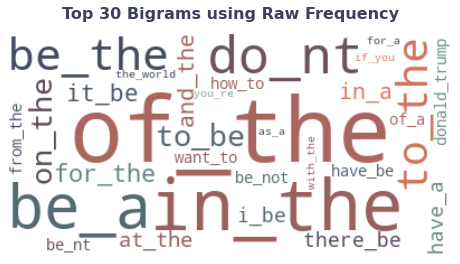

In [199]:
 
wordCloud = WordCloud(max_font_size=80, background_color="white", colormap=cmap, max_words=30)
 
wordCloud.generate_from_frequencies(all_bigrams_dict)
plt.figure(figsize=(8,6))
plt.title('Top 30 Bigrams using Raw Frequency', fontsize=16, pad=15, color="#3D405B", fontweight="bold")
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
 

#### Filtered words bigrams frequency distribution

In [121]:
scored = finder_fw.score_ngrams(bigram_measures.raw_freq)

In [123]:
scored

[(('donald', 'trump'), 0.001392032794100634),
 (('ca', 'nt'), 0.0009179703866116658),
 (('new', 'york'), 0.0008507028156407541),
 (('wo', 'nt'), 0.0006274440671597108),
 (('hillary', 'clinton'), 0.0004989978001764614),
 (('white', 'house'), 0.0004433280862695),
 (('donald', 'trumps'), 0.0003853388009497485),
 (('health', 'care'), 0.0003604034082622554),
 (('look', 'like'), 0.00035170501546429267),
 (('nt', 'know'), 0.00032705956920339827),
 (('climate', 'change'), 0.000316621497845843),
 (('check', 'huffpost'), 0.0003009643908095101),
 (('supreme', 'court'), 0.00029632524798393),
 (('united', 'states'), 0.00029052631945195484),
 (('year', 'ago'), 0.0002841474980667822),
 (('nt', 'want'), 0.000266460766044258),
 (('twitter', 'facebook'), 0.00026356130177827044),
 (('feel', 'like'), 0.00026182162321867786),
 (('bernie', 'sanders'), 0.0002612417303654804),
 (('first', 'time'), 0.00024732430188874),
 (('sure', 'check'), 0.0002467444090355425),
 (('last', 'week'), 0.0002432650519163574),
 (

In [124]:
filteredWords_bigrams_dict = {}
filteredWords_bigrams_scores = list(scored)

for i in range(len(filteredWords_bigrams_scores)):
    filteredWords_bigrams_dict['_'.join(filteredWords_bigrams_scores[i][0])] = filteredWords_bigrams_scores[i][1]

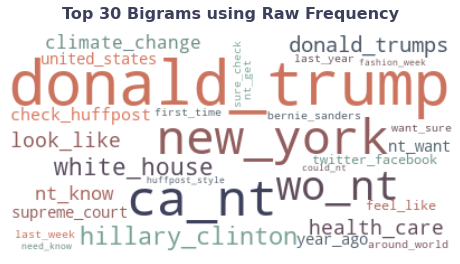

In [198]:

wordCloud = WordCloud(max_font_size=80, background_color="white", colormap=cmap, max_words=30)
 
wordCloud.generate_from_frequencies(filteredWords_bigrams_dict)
plt.figure(figsize=(8,6))
plt.title('Top 30 Bigrams using Raw Frequency', fontsize=16, fontweight="bold", pad=15, color="#3D405B")
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
 

### PMI Scores of  bigrams

#### All words bigrams frequency distribution

In [134]:
scored = finder.score_ngrams(bigram_measures.pmi)

In [135]:
scored

[(('01001100', '01101111'), 22.496258901857896),
 (('01022013', '0351'), 22.496258901857896),
 (('01042013', '0946'), 22.496258901857896),
 (('01101111', '01110110'), 22.496258901857896),
 (('01110110', '01100101'), 22.496258901857896),
 (('01222013', '0621'), 22.496258901857896),
 (('01222014', '0116'), 22.496258901857896),
 (('01302014', '0402'), 22.496258901857896),
 (('02162013', '0358'), 22.496258901857896),
 (('02212014', '0723'), 22.496258901857896),
 (('02252013', '0305'), 22.496258901857896),
 (('03012013', '0253'), 22.496258901857896),
 (('03192014', '0833'), 22.496258901857896),
 (('03302012', '0516'), 22.496258901857896),
 (('040813', '85x'), 22.496258901857896),
 (('04172013', '0432'), 22.496258901857896),
 (('05082013', '0507'), 22.496258901857896),
 (('05152013', '1216'), 22.496258901857896),
 (('05192012', '0801'), 22.496258901857896),
 (('05232013', '0747'), 22.496258901857896),
 (('05262012', '0624'), 22.496258901857896),
 (('05312012', '0531'), 22.496258901857896),
 

In [136]:
all_bigrams_dict_pmi = {}
all_bigrams_pmi_scores = list(scored)

for i in range(len(all_bigrams_pmi_scores)):
    all_bigrams_dict_pmi['_'.join(all_bigrams_pmi_scores[i][0])] = all_bigrams_pmi_scores[i][1]

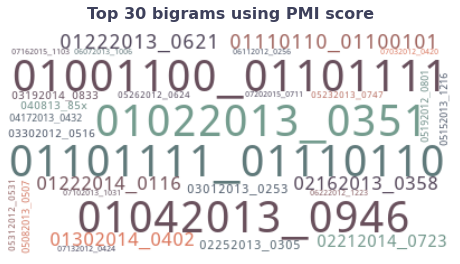

In [197]:
wordCloud = WordCloud(max_font_size=80, background_color='white', colormap=cmap, max_words = 30)
 
wordCloud.generate_from_frequencies(all_bigrams_dict_pmi)
plt.figure(figsize=(8, 6))
plt.title('Top 30 bigrams using PMI score', fontsize=16, fontweight="bold", pad=15, color="#3D405B")
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
 

#### Filtered words bigrams frequency distribution

In [129]:
scored = finder_fw.score_ngrams(bigram_measures.pmi)

In [130]:
scored

[(('02ag', 'a3'), 21.717710306110295),
 (('110yearold', 'huichol'), 21.717710306110295),
 (('11inches', '13inche'), 21.717710306110295),
 (('11p', '10c'), 21.717710306110295),
 (('120day', '26333mile'), 21.717710306110295),
 (('120foot', 'twomaste'), 21.717710306110295),
 (('13inche', '15inchesto'), 21.717710306110295),
 (('13metre', 'yardthick'), 21.717710306110295),
 (('13mia', 'yardiegoals'), 21.717710306110295),
 (('14774foot', 'headwall'), 21.717710306110295),
 (('14tn', '980bn'), 21.717710306110295),
 (('15bn', '25bn'), 21.717710306110295),
 (('160k', 'satay'), 21.717710306110295),
 (('160yearold', 'tintype'), 21.717710306110295),
 (('1890s', 'generalstore'), 21.717710306110295),
 (('1on2', 'fastbreak'), 21.717710306110295),
 (('201room', 'nobis'), 21.717710306110295),
 (('20day', '20city'), 21.717710306110295),
 (('21x', 'postballets'), 21.717710306110295),
 (('23c', '25a'), 21.717710306110295),
 (('24carat', 'goldso'), 21.717710306110295),
 (('24fps', '48fps'), 21.7177103061102

In [131]:
filteredWords_bigrams_dict_pmi = {}
filteredWords_bigrams_pmi_scores = list(scored)

for i in range(len(filteredWords_bigrams_pmi_scores)):
    filteredWords_bigrams_dict_pmi['_'.join(filteredWords_bigrams_pmi_scores[i][0])] = filteredWords_bigrams_pmi_scores[i][1]

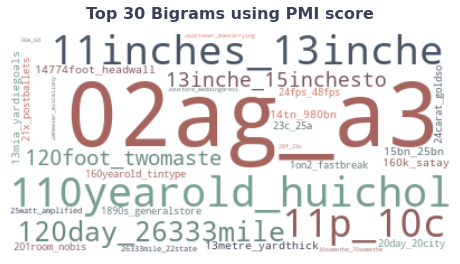

In [196]:
wordCloud = WordCloud(max_font_size=80, background_color='white', colormap=cmap, max_words=30)
 
wordCloud.generate_from_frequencies(filteredWords_bigrams_dict_pmi)
plt.figure(figsize=(8,6))
plt.title('Top 30 Bigrams using PMI score', fontsize=16, fontweight="bold", pad=15, color="#3D405B")
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
 